In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm import tqdm

import plotly.graph_objects as go
import plotly.io as pio

from scipy.fft import fft

In [23]:
bench_df = pd.read_json('bench.json')
deadlift_df = pd.read_json('deadlift.json')

In [24]:
bench_df.head()

,relativeAltitude,seconds_elapsed,pressure,sensor,time,device id,version,device name,sampleRateMs,recording epoch time,...,gravityX,rotationRateY,rotationRateZ,gravityY,quaternionX,quaternionY,quaternionZ,gravityZ,accelerationX,rotationRateX
0,0.10,5.470672,100.772049,WatchBarometer,1.726003e+18,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.08,7.821232,100.772728,WatchBarometer,1.726003e+18,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.05,10.384219,100.773903,WatchBarometer,1.726003e+18,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.08,12.932914,100.773659,WatchBarometer,1.726003e+18,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.13,15.516082,100.772987,WatchBarometer,1.726003e+18,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
deadlift_df.head()

,relativeAltitude,seconds_elapsed,pressure,sensor,time,device id,version,device name,sampleRateMs,recording epoch time,...,gravityX,rotationRateY,rotationRateZ,gravityY,quaternionX,quaternionY,quaternionZ,gravityZ,accelerationX,rotationRateX
0,0.00,6.208046,100.777069,WatchBarometer,1.726003e+18,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.01,9.695971,100.777229,WatchBarometer,1.726003e+18,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.01,10.974882,100.776764,WatchBarometer,1.726003e+18,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.04,13.529390,100.777206,WatchBarometer,1.726003e+18,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.06,16.115831,100.777786,WatchBarometer,1.726003e+18,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
bench_df.tail()

,relativeAltitude,seconds_elapsed,pressure,sensor,time,device id,version,device name,sampleRateMs,recording epoch time,...,gravityX,rotationRateY,rotationRateZ,gravityY,quaternionX,quaternionY,quaternionZ,gravityZ,accelerationX,rotationRateX
2196,NaN,21.853445,NaN,WristMotion,1.726003e+18,NaN,NaN,NaN,NaN,NaN,...,-0.935640,-0.013616,0.029333,0.074047,-0.805941,0.151692,-0.568955,0.345102,-0.001357,0.039605
2197,NaN,21.863407,NaN,WristMotion,1.726003e+18,NaN,NaN,NaN,NaN,NaN,...,-0.935740,-0.015137,0.039292,0.074166,-0.805865,0.151603,-0.569097,0.344803,0.009501,0.039850
2198,NaN,21.873370,NaN,WristMotion,1.726003e+18,NaN,NaN,NaN,NaN,NaN,...,-0.935869,-0.019451,0.047583,0.074715,-0.805710,0.151655,-0.569329,0.344335,0.013323,0.020309
2199,NaN,21.883332,NaN,WristMotion,1.726003e+18,NaN,NaN,NaN,NaN,NaN,...,-0.935896,-0.026777,0.038153,0.075777,-0.805557,0.151966,-0.569505,0.344031,0.005430,-0.006429
2200,NaN,21.893295,NaN,WristMotion,1.726003e+18,NaN,NaN,NaN,NaN,NaN,...,-0.935889,-0.032470,0.019485,0.076928,-0.805418,0.152314,-0.569655,0.343794,-0.003870,0.004393


In [27]:
deadlift_df.tail()

,relativeAltitude,seconds_elapsed,pressure,sensor,time,device id,version,device name,sampleRateMs,recording epoch time,...,gravityX,rotationRateY,rotationRateZ,gravityY,quaternionX,quaternionY,quaternionZ,gravityZ,accelerationX,rotationRateX
1584,NaN,15.787952,NaN,WristMotion,1.726003e+18,NaN,NaN,NaN,NaN,NaN,...,0.911575,0.019388,-0.013407,0.198594,-0.135781,0.549153,0.022993,-0.359988,-0.006012,-0.001950
1585,NaN,15.797914,NaN,WristMotion,1.726003e+18,NaN,NaN,NaN,NaN,NaN,...,0.911579,0.030155,-0.019038,0.198954,-0.135907,0.549217,0.022838,-0.359780,-0.005954,0.004019
1586,NaN,15.807876,NaN,WristMotion,1.726003e+18,NaN,NaN,NaN,NaN,NaN,...,0.911732,0.036922,-0.012755,0.199116,-0.135956,0.549423,0.022720,-0.359300,-0.006795,0.005554
1587,NaN,15.817839,NaN,WristMotion,1.726003e+18,NaN,NaN,NaN,NaN,NaN,...,0.911952,0.038459,-0.009024,0.198958,-0.135877,0.549657,0.022700,-0.358830,-0.006313,0.009614
1588,NaN,15.827801,NaN,WristMotion,1.726003e+18,NaN,NaN,NaN,NaN,NaN,...,0.912168,0.036233,0.005039,0.198562,-0.135689,0.549853,0.022745,-0.358500,-0.006590,0.012160


In [28]:
bench_gx, bench_gy, bench_gz = bench_df['gravityX'].to_numpy(), bench_df['gravityY'].to_numpy(), bench_df['gravityZ'].to_numpy()
deadlift_gx, deadlift_gy, deadlift_gz = deadlift_df['gravityX'].to_numpy(), deadlift_df['gravityY'].to_numpy(), deadlift_df['gravityZ'].to_numpy()

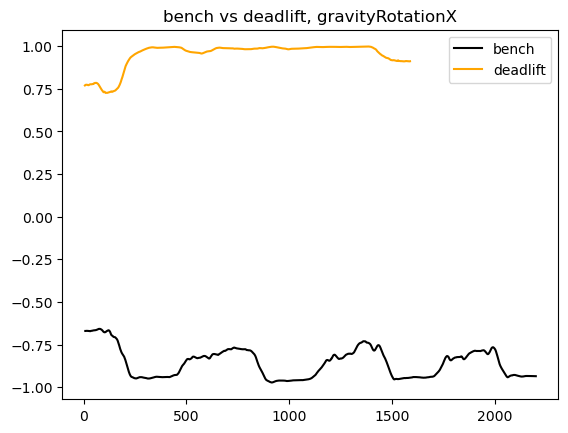

In [29]:
plt.plot(bench_gx, label='bench', color='black')
plt.plot(deadlift_gx, label='deadlift' , color='orange')
plt.title("bench vs deadlift, gravityRotationX")
plt.legend()

/home/neal/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/neal/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


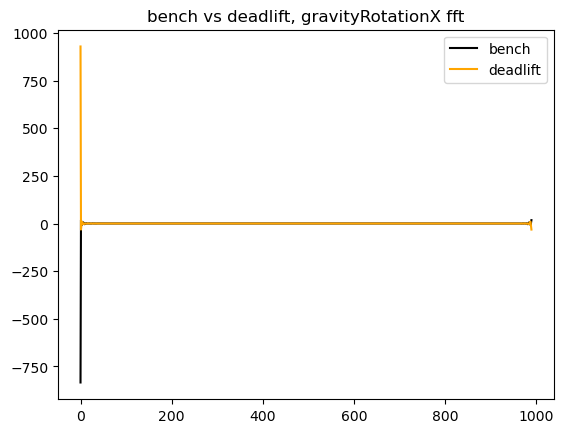

In [30]:
plt.plot(fft(bench_gx[10:1000]), label='bench', color='black')
plt.plot(fft(deadlift_gx[10:1000]), label='deadlift', color='orange')
plt.title("bench vs deadlift, gravityRotationX fft")

plt.legend()

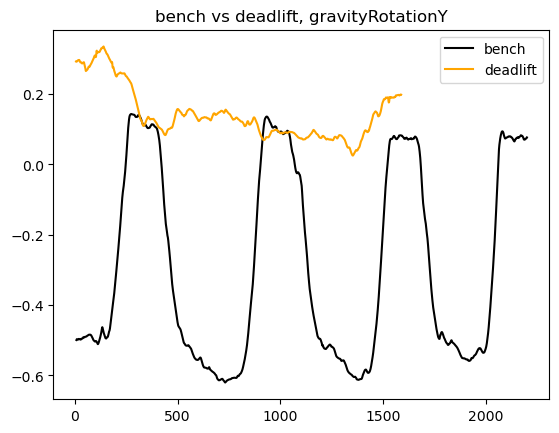

In [31]:
plt.plot(bench_gy, label='bench', color='black')
plt.plot(deadlift_gy, label='deadlift', color='orange')
plt.title("bench vs deadlift, gravityRotationY")

plt.legend()

/home/neal/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/neal/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


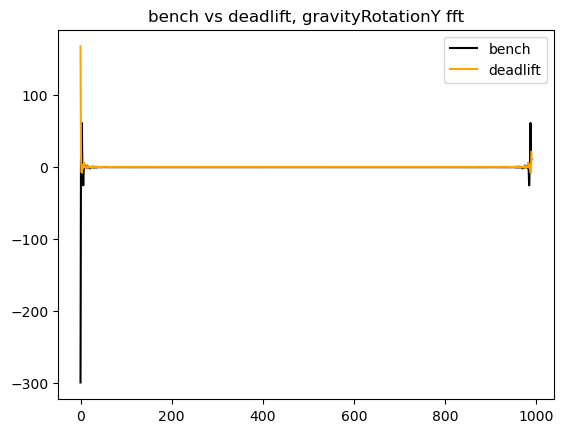

In [32]:
plt.plot(fft(bench_gy[10:1000]), label='bench', color='black')
plt.plot(fft(deadlift_gy[10:1000]), label='deadlift', color='orange')
plt.title("bench vs deadlift, gravityRotationY fft")
plt.legend()

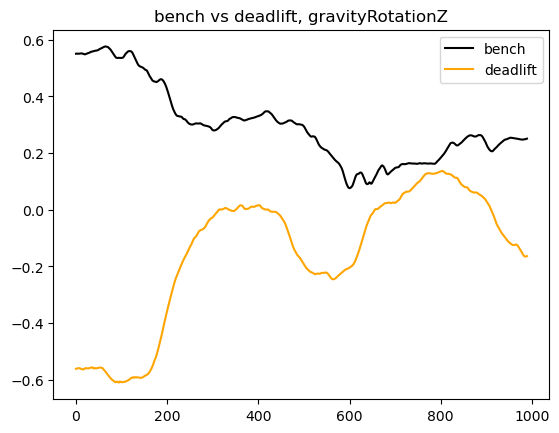

In [33]:
plt.plot((bench_gz[10:1000]), label='bench', color='black')
plt.plot((deadlift_gz[10:1000]), label='deadlift', color='orange')
plt.title("bench vs deadlift, gravityRotationZ")
plt.legend()

/home/neal/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/neal/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


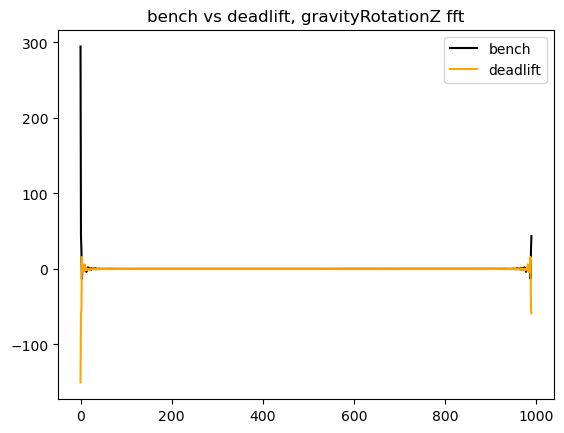

In [34]:
plt.plot(fft(bench_gz[10:1000]), label='bench', color='black')
plt.plot(fft(deadlift_gz[10:1000]), label='deadlift', color='orange')
plt.title("bench vs deadlift, gravityRotationZ fft")
plt.legend()

In [35]:
bench_rx, bench_ry, bench_rz = bench_df['rotationRateX'].to_numpy(), bench_df['rotationRateY'].to_numpy(), bench_df['rotationRateZ'].to_numpy()
deadlift_rx, deadlift_ry, deadlift_rz = deadlift_df['rotationRateX'].to_numpy(), deadlift_df['rotationRateY'].to_numpy(), deadlift_df['rotationRateZ'].to_numpy()

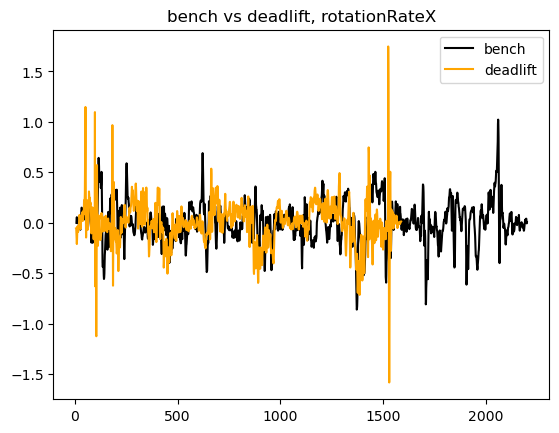

In [36]:
plt.plot(bench_rx, label='bench', color='black')
plt.plot(deadlift_rx, label='deadlift', color='orange')
plt.title("bench vs deadlift, rotationRateX")
plt.legend()

/home/neal/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/neal/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


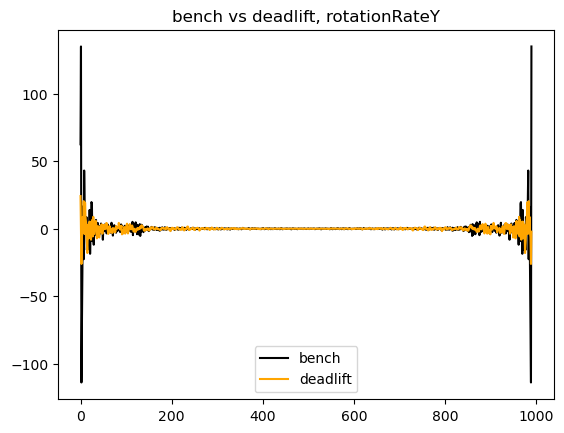

In [37]:
plt.plot(fft(bench_rz[10:1000]), label='bench', color='black')
plt.plot(fft(deadlift_rz[10:1000]), label='deadlift', color='orange')
plt.title("bench vs deadlift, rotationRateY")
plt.legend()

/home/neal/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/neal/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


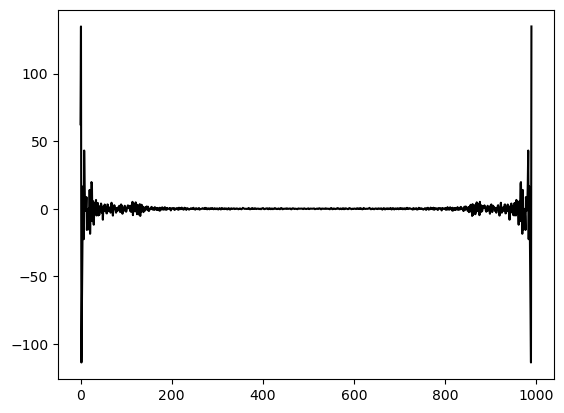

In [38]:
plt.plot(fft(bench_rz[10:1000]), label='bench', color='black')
plt.show()

/home/neal/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/neal/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


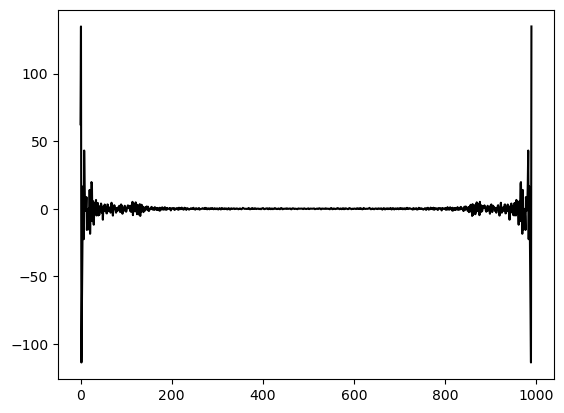

In [39]:
plt.plot(fft(bench_rz[10:1000]), label='bench', color='black')
plt.show()